<a href="https://colab.research.google.com/github/pannavich/2143488_Big_Data_and_AI/blob/main/HW2_Data-Preprocessing-and-Visualization%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('HW2_Housing Survey.csv')
df


,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,ACR,AGS,BDS,BLD,BUS,CONP,ELEP,FS,FULP,GASP,HFL,INSP,KIT,MHP,MRGI,MRGP,MRGT,MRGX,PLM,RMS,RNTM,RNTP,SMP,TEL,TEN,VACS,VAL,VEH,WATP,YBL,...,wgtp41,wgtp42,wgtp43,wgtp44,wgtp45,wgtp46,wgtp47,wgtp48,wgtp49,wgtp50,wgtp51,wgtp52,wgtp53,wgtp54,wgtp55,wgtp56,wgtp57,wgtp58,wgtp59,wgtp60,wgtp61,wgtp62,wgtp63,wgtp64,wgtp65,wgtp66,wgtp67,wgtp68,wgtp69,wgtp70,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,H,186,8,700,4,16,1015675,89,4,1,1.0,NaN,4.0,2.0,2.0,NaN,180.0,0.0,2.0,3.0,3.0,600.0,1.0,NaN,1.0,1300.0,1.0,1.0,1.0,9.0,NaN,NaN,NaN,1.0,1.0,NaN,17.0,3.0,840.0,5.0,...,90,171,27,83,153,148,92,91,91,93,90,26,94,142,24,91,29,84,148,30,93,143,24,88,147,145,91,83,83,86,81,27,93,151,28,79,25,101,157,129
1,H,306,8,700,4,16,1015675,310,1,1,NaN,NaN,1.0,7.0,NaN,NaN,60.0,0.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,600.0,NaN,1.0,3.0,NaN,NaN,1.0,1.0,3.0,...,107,253,321,289,96,343,564,274,118,118,321,261,130,463,294,479,391,307,476,283,116,353,323,374,106,236,380,313,90,94,292,401,81,494,346,496,615,286,454,260
2,H,395,8,100,4,16,1015675,106,2,1,1.0,NaN,3.0,2.0,2.0,NaN,70.0,0.0,2.0,30.0,1.0,200.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,7.0,NaN,NaN,NaN,1.0,2.0,NaN,18.0,2.0,50.0,5.0,...,173,36,168,175,99,103,30,35,155,102,95,107,185,120,114,113,36,115,103,29,183,35,179,169,95,110,28,34,233,97,123,119,168,107,95,101,30,124,106,31
3,H,506,8,700,4,16,1015675,240,4,1,1.0,NaN,4.0,2.0,2.0,NaN,40.0,0.0,2.0,80.0,1.0,200.0,1.0,NaN,1.0,860.0,1.0,1.0,1.0,6.0,NaN,NaN,400.0,1.0,1.0,NaN,19.0,3.0,500.0,2.0,...,239,65,259,247,230,225,82,220,233,419,390,69,74,391,276,70,422,409,223,245,269,488,221,250,247,240,415,234,219,66,68,359,385,71,234,421,76,77,242,231
4,H,835,8,800,4,16,1015675,118,4,1,2.0,1.0,5.0,2.0,2.0,NaN,250.0,0.0,2.0,3.0,3.0,700.0,1.0,NaN,1.0,1900.0,1.0,1.0,1.0,7.0,NaN,NaN,650.0,1.0,1.0,NaN,20.0,5.0,2.0,3.0,...,116,36,135,237,33,33,249,102,84,224,119,250,119,125,126,32,112,33,131,45,101,165,125,41,191,195,49,119,92,44,127,36,119,121,116,209,97,176,144,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,H,1357238,8,300,4,16,1015675,108,2,1,NaN,NaN,2.0,5.0,NaN,NaN,40.0,0.0,1.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,480.0,NaN,2.0,3.0,NaN,NaN,1.0,1.0,2.0,...,85,92,33,25,139,184,47,121,228,32,35,104,148,179,109,151,89,102,202,140,117,96,244,136,27,39,150,107,52,232,198,88,112,26,64,106,142,106,33,111
6492,H,1357340,8,400,4,16,1015675,58,2,1,1.0,NaN,3.0,2.0,2.0,NaN,30.0,0.0,2.0,70.0,1.0,260.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,NaN,16.0,1.0,400.0,3.0,...,113,66,52,97,45,84,51,48,69,13,48,15,71,51,16,82,79,13,18,21,15,67,55,19,53,14,51,66,71,100,66,101,62,52,105,75,20,127,105,68
6493,H,1357874,8,900,4,16,1015675,32,2,1,1.0,NaN,2.0,2.0,2.0,NaN,70.0,0.0,2.0,120.0,1.0,420.0,1.0,NaN,2.0,400.0,2.0,1.0,1.0,4.0,NaN,NaN,240.0,1.0,1.0,NaN,6.0,2.0,410.0,9.0,...,14,11,36,53,32,10,30,36,6,33,64,55,47,34,27,27,33,25,11,13,45,51,41,9,30,50,38,31,49,31,7,8,12,37,44,36,28,33,48,59
6494,H,1357880,8,500,4,16,1015675,123,2,1,2.0,1.0,1.0,2.0,2.0,NaN,140.0,0.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,600.0,NaN,2.0,3.0,NaN,NaN,5.0,1.0,9.0,...,35,115,42,38,123,43,233,115,113,114,193,120,36,144,212,226,122,118,245,127,33,134,33,35,129,38,206,127,116,112,201,123,38,104,186,203,132,118,201,125


In [ ]:
df['VAL']


0       17.0
1        NaN
2       18.0
3       19.0
4       20.0
        ... 
6491     NaN
6492    16.0
6493     6.0
6494     NaN
6495     NaN
Name: VAL, Length: 6496, dtype: float64

In [ ]:
df2=df.loc[df['VAL']==24.0]
df2.shape



(53, 188)

In [ ]:
df_np = df['NP']
df_np.dropna()
df_np.mean()

2.2984913793103448

In [ ]:
df_val = df['VAL']

In [ ]:
df_np

0       4
1       1
2       2
3       4
4       4
       ..
6491    2
6492    2
6493    2
6494    2
6495    2
Name: NP, Length: 6496, dtype: int64

In [ ]:
df_val

0       17.0
1        NaN
2       18.0
3       19.0
4       20.0
        ... 
6491     NaN
6492    16.0
6493     6.0
6494     NaN
6495     NaN
Name: VAL, Length: 6496, dtype: float64

In [ ]:
df3=pd.concat([df_np,df_val],axis=1)
df3

,NP,VAL
0,4,17.0
1,1,NaN
2,2,18.0
3,4,19.0
4,4,20.0
...,...,...
6491,2,NaN
6492,2,16.0
6493,2,6.0
6494,2,NaN


In [ ]:
df3=df3.dropna()
df3

,NP,VAL
0,4,17.0
2,2,18.0
3,4,19.0
4,4,20.0
5,4,15.0
...,...,...
6484,2,6.0
6488,3,15.0
6489,2,16.0
6492,2,16.0


Text(0, 0.5, 'Number of Persons Recorded')

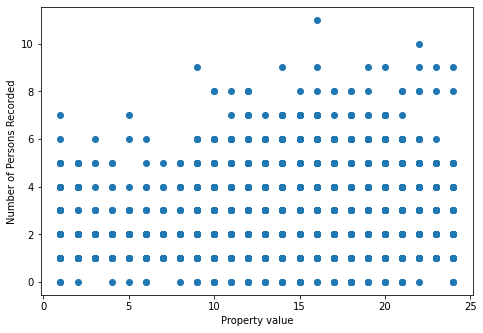

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df3['VAL'],df3['NP'])
ax.set_xlabel('Property value')
ax.set_ylabel('Number of Persons Recorded')



In [ ]:
def func(df):
  df2 = pd.DataFrame(range(25),columns={'val'})
  df2['sum']=0
  df2['count']=0
  for i in df.index:
    val = df.at[i,'VAL']
    np = df.at[i,'NP']
    sum = df2.at[val,'sum']+np
    count = df2.at[val,'count']+1
    df2.loc[val,'sum'] = sum
    df2.loc[val,'count'] = count

  df2['mean']=df2['sum']/df2['count']
  return df2

 



In [ ]:
df4 = func(df3)
df4

,val,sum,count,mean
0,0,0,0,NaN
1,1,145,75,1.933333
2,2,91,42,2.166667
3,3,68,33,2.060606
4,4,64,30,2.133333
5,5,60,26,2.307692
6,6,59,29,2.034483
7,7,48,23,2.086957
8,8,132,70,1.885714
9,9,218,99,2.202020


Text(0, 0.5, 'Average Number of Persons Recorded')

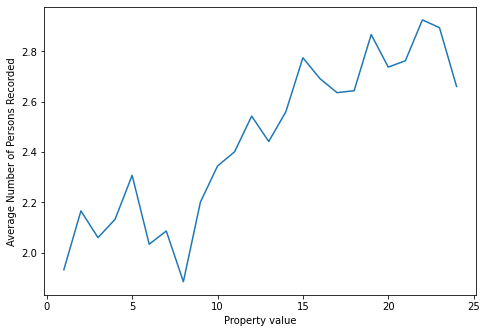

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(df4['val'],df4['mean'])
ax.set_xlabel('Property value')
ax.set_ylabel('Average Number of Persons Recorded')

In [ ]:
df.fincp = df['FINCP']
df.fincp


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0       105600.0
1            NaN
2         9400.0
3        66000.0
4        93000.0
          ...   
6491     -2600.0
6492     53200.0
6493     18000.0
6494     33000.0
6495     32600.0
Name: FINCP, Length: 6496, dtype: float64

In [ ]:

normalized = ((df.fincp-df.fincp.min())/(df.fincp.max()-df.fincp.min()))
normalized

0       0.246250
1            NaN
2       0.048673
3       0.164919
4       0.220372
          ...   
6491    0.024028
6492    0.138630
6493    0.066336
6494    0.097143
6495    0.096322
Name: FINCP, Length: 6496, dtype: float64

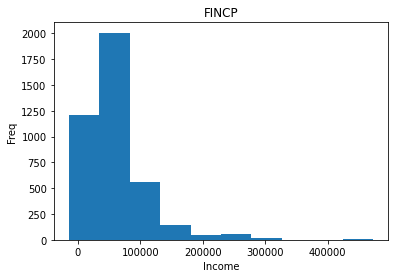

In [ ]:
plt.hist(df.fincp)
plt.title('FINCP')
plt.xlabel('Income')
plt.ylabel('Freq')
plt.show()

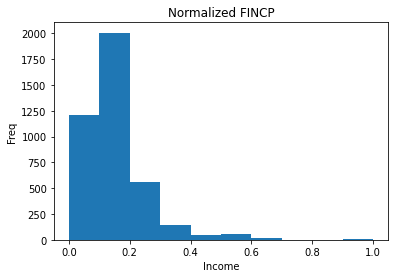

In [ ]:
plt.hist(normalized)
plt.title('Normalized FINCP')
plt.xlabel('Income')
plt.ylabel('Freq')
plt.show()

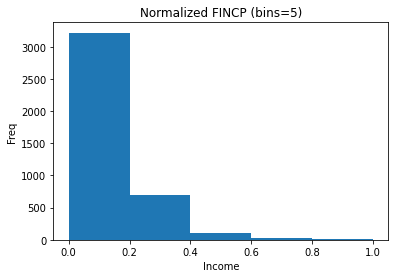

In [ ]:
plt.hist(normalized,bins=5)
plt.title('Normalized FINCP (bins=5)')
plt.xlabel('Income')
plt.ylabel('Freq')
plt.show()